# Objectives
- Training 3 different classifiers
- Comparing performance on the test set
- discussing tradeoffs between accuracy and interpretability

# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Medical Risk Classification/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Medical-Risk-Classification.git

import sys
sys.path.append('/content/Medical-Risk-Classification.git/')
%cd /content/Deep-Learning-Classification-Captions/
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Medical-Risk-Classification'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 14.34 KiB | 7.17 MiB/s, done.
[Errno 2] No such file or directory: '/content/Deep-Learning-Classification-Captions/'
/content
/content
drive  Medical-Risk-Classification  sample_data


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

train_data = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/train_data.csv')
test_data = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/test_data.csv')

In [4]:
X_train = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/X_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/X_test.csv')
y_train = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/Data/y_test.csv')


# Modeling

Model Notes: Classifier Comparison for Medical Risk Prediction

| Model                      | Notes                                                                 |
|----------------------------|-----------------------------------------------------------------------|
| **Logistic Regression**    | Interpretable, coefficients easy to explain, good baseline model      |
| **Decision Tree Classifier** | Clear visual explanations, interpretable thresholds, handles imbalance with tuning |
| **Random Forest / XGBoost** | Higher accuracy, robust to overfitting, harder to explain—great for surrogate modeling |

- Class weighting or SMOTE to address imbalance
- Precision, recall, F1-score, and ROC-AUC
- Stratified split

In [5]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
tree = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

In [6]:
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree,
    'Random Forest': rf
}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.


----- Logistic Regression -----
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.99      1.00      1.00       196

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

[[199   1]
 [  0 196]]


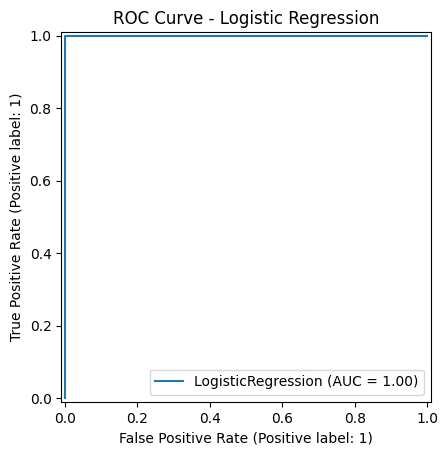

----- Decision Tree -----
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.99      1.00      1.00       196

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

[[199   1]
 [  0 196]]


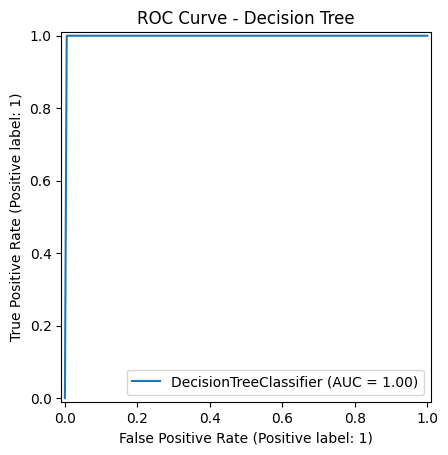

----- Random Forest -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       196

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

[[200   0]
 [  0 196]]


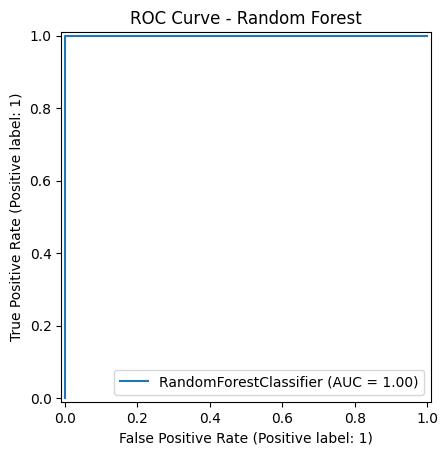

In [7]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    print(f"----- {name} -----")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'ROC Curve - {name}')
    plt.show()


In [8]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,1.000000,1.000000,1.0,1.000000,1.0000
0,Logistic Regression,0.997475,0.994924,1.0,0.997455,1.0000
1,Decision Tree,0.997475,0.994924,1.0,0.997455,0.9975


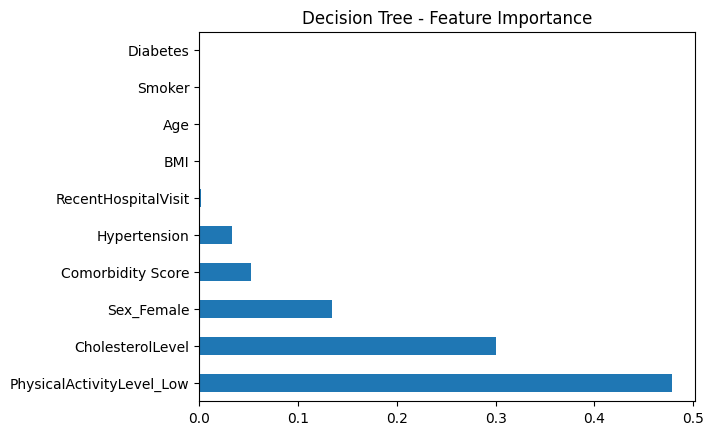

In [9]:
feat_imp = pd.Series(tree.feature_importances_, index=X_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Decision Tree - Feature Importance')
plt.show()

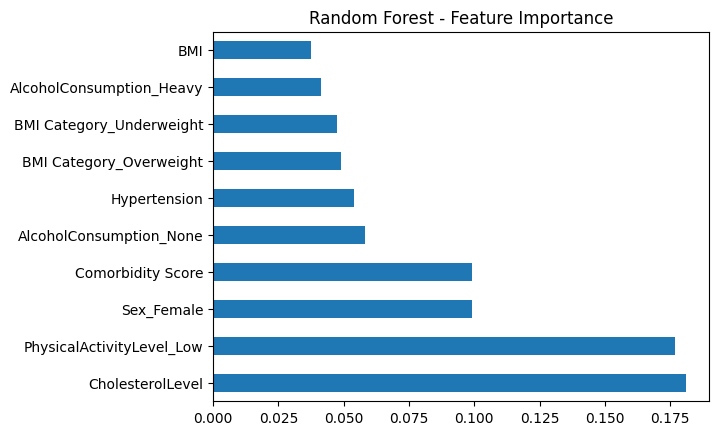

In [10]:
feat_imp_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp_rf.nlargest(10).plot(kind='barh')
plt.title('Random Forest - Feature Importance')
plt.show()

In [11]:
X_train.describe()

,Age,BMI,Smoker,Hypertension,Diabetes,CholesterolLevel,RecentHospitalVisit,FamilyHistory,Comorbidity Score
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,55.296203,26.744931,0.320886,0.167722,0.152532,211.391392,0.213924,0.167722,0.940506
std,18.007130,4.522101,0.466965,0.373737,0.359649,26.729205,0.410204,0.373737,0.656438
min,18.000000,14.900000,0.000000,0.000000,0.000000,115.500000,0.000000,0.000000,0.000000
25%,40.000000,23.600000,0.000000,0.000000,0.000000,200.275000,0.000000,0.000000,1.000000
50%,55.000000,27.246283,0.000000,0.000000,0.000000,217.283350,0.000000,0.000000,1.000000
75%,72.000000,29.500000,1.000000,0.000000,0.000000,228.154871,0.000000,0.000000,1.000000
max,89.000000,40.700000,1.000000,1.000000,1.000000,293.600000,1.000000,1.000000,3.000000


In [12]:
y_pred[:10]
y_test[:10].values

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])

Since the dataset was synthetically generated using strong conditional rules, the classification task became highly separable. This likely contributed to the near-perfect performance of all models. In a real-world clinical setting, we would expect more noise and confounding variables, which would result in lower and more realistic scores.

In [13]:
import pickle

model_path = '/content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/tree_model.pkl'  # Specify the desired path

with open(model_path, 'wb') as f:
    pickle.dump(tree, f)

print(f"Decision tree model saved to: {model_path}")

Decision tree model saved to: /content/drive/My Drive/Professional/Portfolio/Medical Risk Classification/tree_model.pkl
